<a href="https://colab.research.google.com/github/goutam63/deep-learning/blob/main/dog_vs_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"goutam8050","key":"ff324b6d9a135757ce4d27fad78f5217"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 96% 523M/543M [00:02<00:00, 223MB/s]
100% 543M/543M [00:02<00:00, 197MB/s]
 96% 260M/271M [00:01<00:00, 171MB/s]
100% 271M/271M [00:01<00:00, 172MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 76.5MB/s]


In [ ]:
! mkdir train

In [ ]:
! unzip train.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/train/dog.5499.jpg  
  inflating: train/train/dog.55.jpg  
  inflating: train/train/dog.550.jpg  
  inflating: train/train/dog.5500.jpg  
  inflating: train/train/dog.5501.jpg  
  inflating: train/train/dog.5502.jpg  
  inflating: train/train/dog.5503.jpg  
  inflating: train/train/dog.5504.jpg  
  inflating: train/train/dog.5505.jpg  
  inflating: train/train/dog.5506.jpg  
  inflating: train/train/dog.5507.jpg  
  inflating: train/train/dog.5508.jpg  
  inflating: train/train/dog.5509.jpg  
  inflating: train/train/dog.551.jpg  
  inflating: train/train/dog.5510.jpg  
  inflating: train/train/dog.5511.jpg  
  inflating: train/train/dog.5512.jpg  
  inflating: train/train/dog.5513.jpg  
  inflating: train/train/dog.5514.jpg  
  inflating: train/train/dog.5515.jpg  
  inflating: train/train/dog.5516.jpg  
  inflating: train/train/dog.5517.jpg  
  inflating: train/train/dog.5518.jpg  
  inflating: train/train/dog.5519

In [ ]:
! mkdir test

In [ ]:
! unzip test1.zip -d test

Streaming output truncated to the last 5000 lines.
  inflating: test/test1/5499.jpg     
  inflating: test/test1/55.jpg       
  inflating: test/test1/550.jpg      
  inflating: test/test1/5500.jpg     
  inflating: test/test1/5501.jpg     
  inflating: test/test1/5502.jpg     
  inflating: test/test1/5503.jpg     
  inflating: test/test1/5504.jpg     
  inflating: test/test1/5505.jpg     
  inflating: test/test1/5506.jpg     
  inflating: test/test1/5507.jpg     
  inflating: test/test1/5508.jpg     
  inflating: test/test1/5509.jpg     
  inflating: test/test1/551.jpg      
  inflating: test/test1/5510.jpg     
  inflating: test/test1/5511.jpg     
  inflating: test/test1/5512.jpg     
  inflating: test/test1/5513.jpg     
  inflating: test/test1/5514.jpg     
  inflating: test/test1/5515.jpg     
  inflating: test/test1/5516.jpg     
  inflating: test/test1/5517.jpg     
  inflating: test/test1/5518.jpg     
  inflating: test/test1/5519.jpg     
  inflating: test/test1/552.jpg      

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import os
import glob as gb
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
from zipfile import ZipFile
import matplotlib.image as mpimg
import warnings


In [ ]:
#def train_data(**data):
  #train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
  #train_set=train_datagen.flow_from_directory('/content/train',target_size=(64,64),batch_size=32,class_mode='binary')

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [ ]:
train_set=train_datagen.flow_from_directory('/content/train',target_size=(64,64),batch_size=32,class_mode='binary')

Found 25000 images belonging to 1 classes.


In [ ]:
train_path="train/train"
test_path="test/test1"

In [ ]:
filenames = os.listdir(train_path)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(category)
    else:
        categories.append(category)

df = pd.DataFrame({
    'Image': filenames,
    'Category': categories})
df.head(-5)

,Image,Category
0,cat.10116.jpg,cat
1,dog.6081.jpg,dog
2,cat.3569.jpg,cat
3,dog.8051.jpg,dog
4,cat.10133.jpg,cat
...,...,...
24990,dog.687.jpg,dog
24991,cat.8898.jpg,cat
24992,cat.10302.jpg,cat
24993,cat.133.jpg,cat


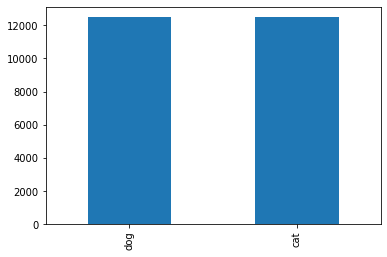

In [ ]:
df['Category'].value_counts().plot.bar()

In [ ]:
#Split Train and Test Set
data_train, data_validation = train_test_split(df, test_size=0.1, random_state=18)

In [ ]:
data_train = data_train.reset_index(drop=True)
data_validation = data_validation.reset_index(drop=True)

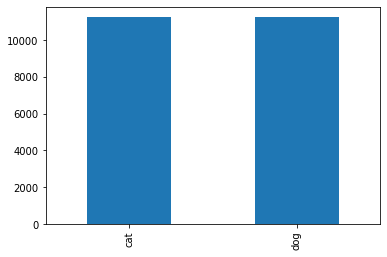

In [ ]:
data_train['Category'].value_counts().plot.bar()

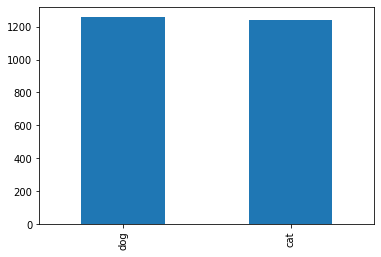

In [ ]:
data_validation['Category'].value_counts().plot.bar()

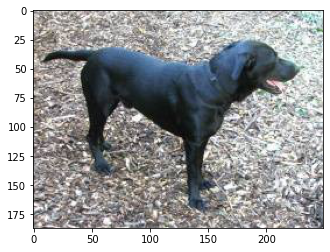

In [ ]:
import random
import matplotlib.pyplot as plt
sample = random.choice(df['Image'])
plt.imshow(plt.imread(("train/train/"+sample)))


In [ ]:
size  = 150
channels = 3
batch = 128
epochs = 5

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             width_shift_range=.2, height_shift_range=.2,
                             rotation_range=30,
                             brightness_range=[0.8, 1.2],
                             horizontal_flip=True)

In [ ]:
datagenValidation = ImageDataGenerator(rescale=1./255)

In [ ]:
X_train = datagen.flow_from_dataframe(
    data_train, 
    directory = train_path, 
    x_col = 'Image',
    y_col = 'Category',
    target_size= (size,size),
    class_mode = 'binary',
    shuffle = True,
    batch_size = batch)

Found 22500 validated image filenames belonging to 2 classes.


In [ ]:
X_validation = datagenValidation.flow_from_dataframe(
    data_validation, 
    directory = train_path, 
    x_col = 'Image',
    y_col = 'Category',
    target_size= (size,size),
    class_mode = 'binary',
    shuffle = True,
    batch_size = batch)

Found 2500 validated image filenames belonging to 2 classes.


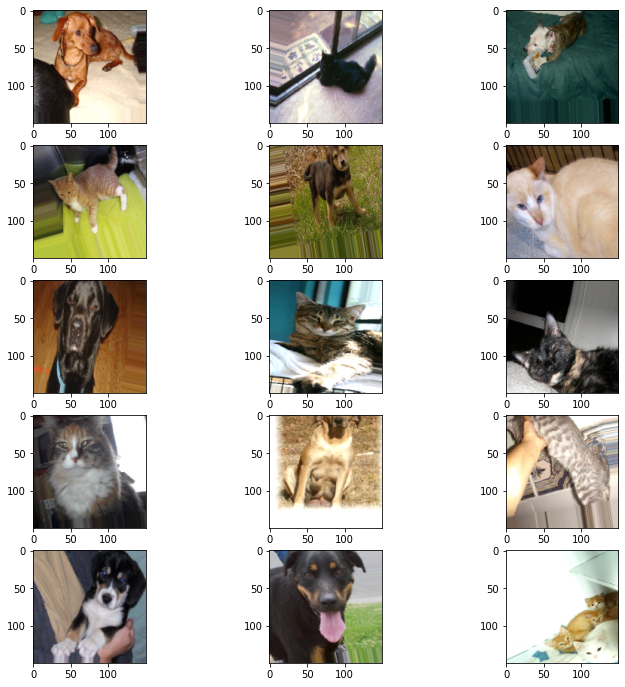

In [ ]:
plt.figure(figsize = (12,12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in X_train:
        image = X_batch[0] #Y_batch is Category
        plt.imshow(image)
        break

In [ ]:
checkpoint_filepath = 'best_model.hdf5'
callback_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_accuracy', mode='max', save_best_only=True)
callback_learningrate = ReduceLROnPlateau(monitor='val_accuracy', mode='max', min_delta=0.03, patience=3, factor=.5, min_lr=0.00001, verbose=1)
callbacks = [callback_checkpoint, callback_learningrate]

In [ ]:
Model = Sequential([Conv2D(filters=32,  kernel_size=(3,3), activation="relu", input_shape=(size,size,channels)),
                    BatchNormalization(),
                    MaxPool2D(2,2),
                    Dropout(0.2),
                 
                    Conv2D(filters=64,  kernel_size=(5,5), activation="relu"),
                    BatchNormalization(),
                    MaxPool2D(3,3),
                    Dropout(0.2),
                
                    Conv2D(filters=128, kernel_size=(7,7), activation="relu"),
                    BatchNormalization(),
                    MaxPool2D(4,4),
                    Dropout(0.2),
                 
                    Flatten(),
                    
                    Dense(units=4096, activation="relu"),                 
                    BatchNormalization(),
                    Dropout(0.4),
                    
                    Dense(units=1024, activation="relu"),
                    BatchNormalization(),
                    Dropout(0.3),
                    
                                        
                    Dense(units=2, activation="relu"),
                    BatchNormalization(),
                    Dropout(0.5),
                    
                    Dense(units=1, activation="sigmoid"),
])


Model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])


In [ ]:
Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 70, 70, 64)        51264     
_________________________________________________________________
batch_normalization_7 (Batch (None, 70, 70, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)       

In [ ]:
history = Model.fit(X_train, validation_data=X_validation, epochs=epochs, callbacks=callbacks)

Epoch 1/5
176/176 [==============================] - 189s 1s/step - loss: 0.8114 - accuracy: 0.5429 - val_loss: 0.6886 - val_accuracy: 0.4968
Epoch 2/5
176/176 [==============================] - 186s 1s/step - loss: 0.7344 - accuracy: 0.5814 - val_loss: 0.8968 - val_accuracy: 0.5156
Epoch 3/5
176/176 [==============================] - 183s 1s/step - loss: 0.6855 - accuracy: 0.6108 - val_loss: 0.6067 - val_accuracy: 0.6524
Epoch 4/5
176/176 [==============================] - 185s 1s/step - loss: 0.6381 - accuracy: 0.6350 - val_loss: 0.6430 - val_accuracy: 0.6364
Epoch 5/5
176/176 [==============================] - 185s 1s/step - loss: 0.5977 - accuracy: 0.6648 - val_loss: 0.8332 - val_accuracy: 0.5628


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
Model = tf.keras.models.load_model('best_model.hdf5')

In [ ]:
filenames = os.listdir(test_path)
df_test = pd.DataFrame({'Image':filenames})
df_test.head(10)

In [ ]:
X_test = datagenValidation.flow_from_dataframe(
    df_test, 
    directory=test_path, 
    x_col='Image',
    y_col=None,
    class_mode=None,
    target_size= (size,size),
    batch_size=batch,
    shuffle=False
)

In [ ]:
X_train.class_indices

In [ ]:
y_pred = Model.predict(X_test)

In [ ]:
y_pred = np.where(y_pred > .5, "Dog", "Cat")
y_pred

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[0][i])
    plt.xlabel(y_pred[i])
    
plt.show()


In [ ]:
label = np.where(y_pred=="Cat", 0, 1)
label

In [ ]:
df_submission = pd.read_csv('/content/sampleSubmission.csv')
df_submission['label'] = label
df_submission.head(10)

In [ ]:
df_submission.to_csv('submission.csv', index=False)

In [ ]:
submission = pd.read_csv('./submission.csv')
submission.head(10)